# CNN_모델 설계 및 학습

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

my_epochs=10

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

cnn = Sequential()
cnn.add(Dense(units=1024,activation='relu',input_shape=(28*28,)))
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
print(cnn.summary())
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=my_epochs, validation_data=(x_test,y_test))

cnn.save('mlp.h5')

res = cnn.evaluate(x_test,y_test)
print("정확율 :",res[1]*100)

2025-09-24 12:40:16.457086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 12:40:16.457254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 12:40:16.812512: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-24 12:40:15.879708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-24 12:40:22.709003: W tensorflow/compiler/tf2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1596426 (6.09 MB)
Trainable params: 1596426 (6.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-09-24 12:40:36.787648: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-24 12:40:39.284674: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


None


2025-09-24 12:40:39.689920: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 9s 15ms/step - loss: 0.2015 - accuracy: 0.9391 - val_loss: 0.1065 - val_accuracy: 0.9667
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.0805 - val_accuracy: 0.9759
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0797 - val_accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0911 - val_accuracy: 0.9751
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0795 - val_accuracy: 0.9789
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0913 - val_accuracy: 0.9766
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0889 - val_accuracy: 0.9778

/home/devna0111/miniconda3/envs/dl/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 5ms/step - loss: 0.0922 - accuracy: 0.9776
정확율 : 97.75999784469604


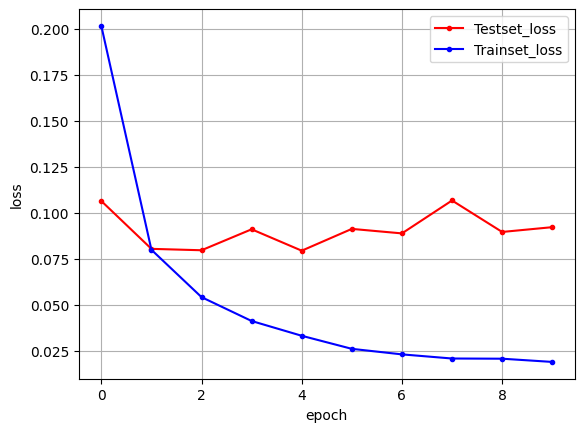

In [3]:
import matplotlib.pyplot as plt
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [2]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
model = tf.keras.models.load_model('mlp.h5')

In [6]:
def reset() :
    global img
    
    img = np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5) :
        cv.rectangle(img, (10+i*100,50), (10+(i+1)*100,150),(0,0,255))
    cv.putText(img, 
               'e : erase // s : show // r : recognition // q : quit', (10,40),
               cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals() :
    numerals = []
    for i in range(5) :
        roi = img[51:149, 11+i*100:9+(i+1)*100,0]
        roi = 255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals

def show() :
    numerals = grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()

def recognition() :
    numerals = grab_numerals()
    numerals = numerals.reshape(5,28*28)
    numerals = numerals.astype(np.float32)/255.0
    res = model.predict(numerals)
    print(res)
    class_id = np.argmax(res, axis=1)
    print(class_id)
    for i in range(5) :
        cv.putText(img, str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),1)
    # winsound.Beep(1000,500)
    
BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param) :
    if event == cv.EVENT_LBUTTONDOWN :
        cv.circle(img,(x,y),BrushSiz,LColor,-1)
    elif event == cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON :
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while True :
    cv.imshow('Writing',img)
    key = cv.waitKey(1)
    if key == ord('e') :
        reset()
    elif key == ord('s') :
        show()
    elif key == ord('r') :
        recognition()
    elif key == ord('q') :
        break
    
cv.destroyAllWindows()

1/1 [==============================] - 0s 47ms/step
[[2.41066437e-06 9.95130658e-01 2.81168877e-06 7.38621975e-06
  3.02892768e-05 1.47761875e-06 4.42553187e-07 1.88070408e-03
  2.84290803e-03 1.00969461e-04]
 [3.06254915e-05 1.29776512e-04 9.99258101e-01 8.50238430e-05
  3.46829097e-07 1.65320944e-06 3.34038100e-06 3.92428192e-04
  9.82858182e-05 4.32855131e-07]
 [1.55081740e-04 1.16052324e-04 5.07856486e-04 9.97613549e-01
  1.01210999e-05 7.55967412e-05 9.51736979e-07 3.17571503e-05
  7.64086377e-04 7.24866171e-04]
 [4.21050761e-04 1.78476781e-04 3.30298580e-03 1.24756608e-03
  3.21743712e-02 1.84658635e-03 3.40422179e-04 2.38839700e-03
  1.28494333e-02 9.45250750e-01]
 [1.96518330e-03 3.83804785e-04 2.04715389e-03 4.48168874e-01
  5.64765593e-04 8.86930004e-02 9.59378813e-05 1.77441947e-02
  6.97933063e-02 3.70543718e-01]]
[1 2 3 9 3]
